In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:


# np.random.seed(42)
# n = 45
# x = np.arange(1, n+1)
# area = np.random.uniform(50, 300, n).round(2)
# prezzo = (area * 250 + np.random.normal(0, 5000, n)).round(2)

# df = pd.DataFrame({'area': area, 'prezzo': prezzo})

# # Salva in file .txt con tabulazione
# df.to_csv("dataset.txt", index=False, sep='\t')


In [3]:
data = np.loadtxt("dataset/simple_dataset.txt", skiprows=1) #salta la prima riga di intestazione
X = data[:, 0] #prende la prima colonna
Y = data[:, 1].reshape(-1, 1) #prende la seconda colonna

In [4]:
X = np.vstack((np.ones((X.size,)),X)).T

In [5]:
print("X shape: ",X.shape)
print("Y shape: ",Y.shape)

X shape:  (45, 2)
Y shape:  (45, 1)


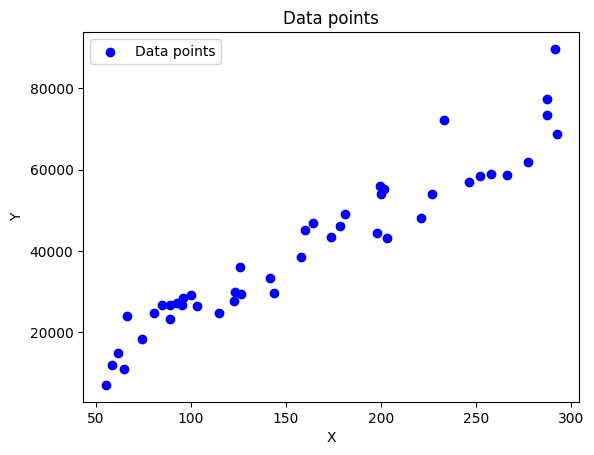

In [6]:
plt.scatter(X[:,1], Y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data points')
plt.legend()
plt.show()

![Linear Regression](LR.png)

In [7]:
def model(X, Y, learning_rate, iterations):
    m = Y.size
    theta = np.zeros((2,1))
    
    cost_list = []
    
    for i in range(iterations):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m)) * np.sum(np.square(y_pred - Y))
        d_theta = (1/m)*np.dot(X.T,(y_pred-Y))
        theta = theta - learning_rate * d_theta
        
        cost_list.append(cost)
        
        if i % 10000 == 0:
             print("Cost after iteration {}: {}".format(i, cost))
    
    return theta, cost_list

In [8]:
iterations = 100
learning_rate = 0.000001
theta, cost_list = model(X, Y, learning_rate=learning_rate, iterations=iterations)


Cost after iteration 0: 1015132797.3798378


In [9]:
# 4. Prediction for a single area = 150 sqm
single_area = 150
y_pred = np.dot([1, single_area], theta)
print(f"📌 Prediction for area {single_area} sqm: €{y_pred[0]:,.2f}")

# 5. Predictions for 10 randomly generated areas
np.random.seed(123)
random_areas = np.random.uniform(50, 300, 10).round(2)

# Prepare X input with bias column
X_test = np.hstack((np.ones((random_areas.shape[0], 1)), random_areas.reshape(-1, 1)))
y_preds = X_test @ theta

# 6. Print the results
print("\n📊 Predictions for 10 random areas:")
for area_val, price_val in zip(random_areas, y_preds):
    print(f"Area: {area_val:6.2f} sqm → Predicted price: €{price_val[0]:,.2f}")


📌 Prediction for area 150 sqm: €36,231.73

📊 Predictions for 10 random areas:
Area: 224.12 sqm → Predicted price: €54,134.41
Area: 121.53 sqm → Predicted price: €29,355.18
Area: 106.71 sqm → Predicted price: €25,775.61
Area: 187.83 sqm → Predicted price: €45,369.05
Area: 229.87 sqm → Predicted price: €55,523.25
Area: 155.78 sqm → Predicted price: €37,627.81
Area: 295.19 sqm → Predicted price: €71,300.41
Area: 221.21 sqm → Predicted price: €53,431.54
Area: 170.23 sqm → Predicted price: €41,118.01
Area: 148.03 sqm → Predicted price: €35,755.90


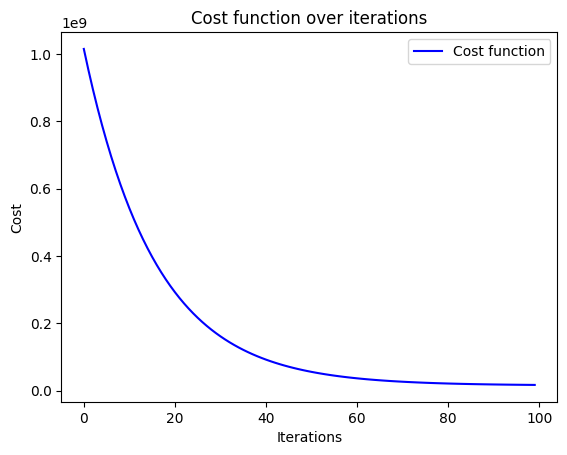

In [10]:
rng = np.arange(0, iterations)
plt.plot(rng, cost_list, color='blue', label='Cost function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.legend()
plt.show()